## Web Traffic Analytics Lab 

### Retrieve Your Downloaded Chrome Browsing History Data

In [1]:
# This step assumes you have already downloaded the browsing history via Chrome plug-in

import json
import urlparse
import os

data_path = os.path.expanduser('~') + "/Downloads/chrome_history.json"

with open(data_path, 'rw+') as data_file:
    data = json.load(data_file)

### Check out the Structure of the Data

In [2]:
#check out the structure of the file
print type(data)
print ' '
print data[0].keys()
print ' '
print data[0]['url']

parsed = urlparse.urlparse(data[0]['url'])
print parsed[1].encode("ascii")

<type 'list'>
 
[u'typedCount', u'title', u'url', u'lastVisitTime', u'visitCount', u'id']
 
https://chrome.google.com/webstore/detail/export-historybookmarks-t/dcoegfodcnjofhjfbhegcgjgapeichlf/related?hl=en-US
chrome.google.com


### Create a Web Browsing History Based on the Visited Site's Domain

In [3]:
n = len(data)
#.encode('ascii)  kills the u before words
link_list = [urlparse.urlparse(data[k]['url'])[1].encode('ascii') for k in range(n)]

In [7]:
link_list[:10]

['chrome.google.com',
 'chrome.google.com',
 'chrome.google.com',
 'chrome.google.com',
 'chrome.google.com',
 'www.google.com',
 'www.google.com',
 'support.google.com',
 'productforums.google.com',
 'www.google.com']

### Create a Visit Frequency Dictionary for Each of Your Domains

In [9]:
count = dict()
for k in link_list:
    if k:
        count[k] = count.get(k,0) + 1  
        
# sorted(count, key=lambda x: x[1])
# count

In [10]:
import operator
li_sort = sorted(count.items(), key=operator.itemgetter(1), reverse = True)[:50]
li_sort[:15
        0]

[('www.google.com', 5185),
 ('www.facebook.com', 690),
 ('localhost:8889', 511),
 ('github.com', 498),
 ('localhost:8888', 387),
 ('www.youtube.com', 305),
 ('en.wikipedia.org', 242),
 ('www.realtor.com', 203),
 ('www.point2homes.com', 190),
 ('www.imdb.com', 149),
 ('www.linkedin.com', 147),
 ('www.kaggle.com', 147),
 ('www.search.greaterlehighvalleyrealtors.com', 142),
 ('localhost:8890', 141),
 ('www.yelp.com', 121),
 ('localhost:8891', 113),
 ('www.ebay.com', 113),
 ('losangeles.craigslist.org', 106),
 ('mail.google.com', 92),
 ('www.roadandtrack.com', 89),
 ('stackoverflow.com', 89),
 ('wikileaks.org', 87),
 ('www.unbelievable-facts.com', 79),
 ('www.zerohedge.com', 71),
 ('www.cycleworld.com', 67),
 ('twitter.com', 67),
 ('pandas.pydata.org', 66),
 ('omgwhut.com', 64),
 ('www.rt.com', 55),
 ('scikit-learn.org', 55),
 ('lifehacklane.com', 53),
 ('stanford.edu', 49),
 ('www.politifact.com', 48),
 ('t.co', 45),
 ('docs.google.com', 40),
 ('chdoig.github.io', 40),
 ('fivethirtyeight.

In [ ]:
# from operator import itemgetter, attrgetter, methodcaller

# print sorted(count, key=itemgetter(1)) == sorted(count, key=lambda x: x[1])

/Users/colinjclemence/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


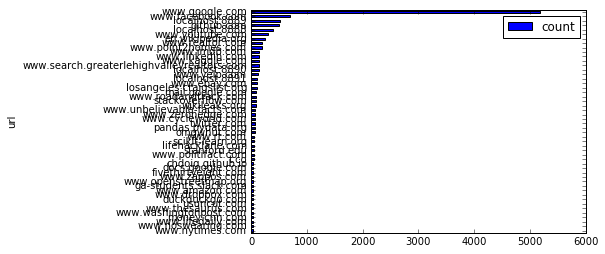

In [12]:
import pandas as pd
%matplotlib inline

urls = pd.DataFrame(li_sort, columns=['url', 'count'])

urls.index = urls['url']

urls.sort('count').plot(kind="barh")

### What Additional Information Can I Obtain from My Browsing History?

In [14]:
import re
re.sub(r'[^\w]', ' ', urlparse.urlparse(data[560]['url'])[2].encode('ascii'))

' search'

In [15]:
import re
def paras_extract(data):
    w = list()
    for i in range(len(data)): 
        ll = urlparse.urlparse(data[i]['url'])[2].encode('ascii')
        w.append(re.sub(r'[^\w]', ' ', ll))
    return w

In [16]:
ptext = ''.join(paras_extract(data))
# ptext.split()

# Google Search Terms
# s1 = set(re.findall(r'20\w+', ptext)) 

In [22]:
ptext[:250]

' webstore detail export historybookmarks t dcoegfodcnjofhjfbhegcgjgapeichlf related webstore detail export historybookmarks t dcoegfodcnjofhjfbhegcgjgapeichlf webstore search export 20history 2F 20bookmarks webstore category apps webstore detail expo'

### Installation of Additional Packages May be Necessary

In [21]:
!pip install git+git://github.com/amueller/word_cloud.git   
!conda install pil 

  Cloning git://github.com/amueller/word_cloud.git to /var/folders/s1/vy9vblp16cl_tjmprjywdhlr0000gn/T/pip-tkdHIB-build
  Running setup.py install for wordcloud ... - \ | / - done
Fetching package metadata .......
Solving package specifications: ..........

Package plan for installation in environment /Users/colinjclemence/anaconda:

The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    lcms-1.19                  |                0         205 KB
    pil-1.1.7                  |           py27_2         351 KB
    ------------------------------------------------------------
                                           Total:         556 KB

The following NEW packages will be INSTALLED:

    lcms: 1.19-0      
    pil:  1.1.7-py27_2

Proceed ([y]/n)? ^C
Operation aborted.  Exiting.



In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in ptext.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [24]:
wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='black',
                      width=2400,
                      height=1800
                     ).generate(no_urls_no_tags)

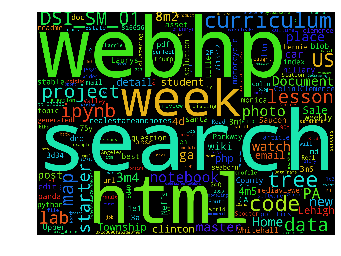

In [25]:
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./my_wordcloud_1.png', dpi=300)
plt.show()

### Preparation for Map Reduce

In [26]:
#create file compatible with map reduce

with open('web_history.tsv', 'w_') as data_out:
    for d in data: 
        #data_out.write(str(d['url'] + '\t' + str(d['visitCount']) + '\n'))
        data_out.write(str(d['url'] + '\n'))

### Map Reduce Execution

In [ ]:
!cat web_history.tsv | python ./code/mapper.py | sort -k1 | python ./code/reducer.py | sort -nk 2 -r | head -n 15